# Homework - perform multiple linear regression on the
`FuelConsumption.csv data`

# Nicolás Echeverri Rojas

* use follwing features: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'`
* make a two 2D plot of ENGINESIZE vs CO2EMISSIONS and CYLINDERS vs CO2EMISSIONS
* make a 3D plot of ENGINESIZE and CYLINDERS vs CO2EMISSIONS
* apply feature scaling (be able to swith it off and on) (commented or not commented)
* split the data into X_train/y_train and X_test/y_test (80%-20%)
  using `from sklearn.model_selection import train_test_split`
* train the model using X_train data
* evaluate the fit (R-Squared)
* print the metrics MAE, MAPE
* predict CO2 emission of the 10 randomly chosen cars, compare with the true values
* compare results with the simple single feature regression
* write short comments on each step

# Load python libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
Se cargan las librerías para realizar le manejo y graficación de datos mucho más sencilla

SyntaxError: invalid syntax (Temp/ipykernel_7676/1820673492.py, line 1)

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data into Pandas</h2>

In [22]:
fuel=pd.read_csv("FuelConsumption.csv")
fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Se carga con pd.read_csv puesto que "FuelConsumption es un archivo de este tipo



Let's select some features that we want to use for regression.


In [23]:
fuelRegression=fuel[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]

Let's plot Emission values with respect to Engine size:


<h2 id="reading_data">Visualize the data in 2D</h2>

Text(0, 0.5, 'CO2 emission')

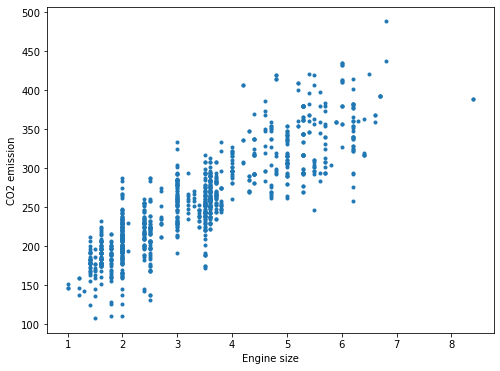

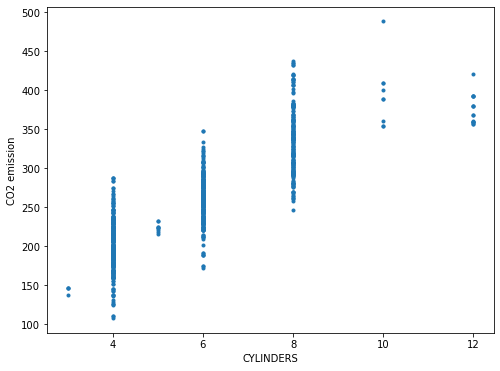

In [24]:
plt.figure(figsize=(8,6))
plt.plot( fuelRegression['ENGINESIZE'],  fuel['CO2EMISSIONS'], "." )
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")


plt.figure(figsize=(8,6))
plt.plot( fuelRegression['CYLINDERS'],  fuel['CO2EMISSIONS'], "." )
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 emission")

Se observa una tendencia líneal tanto en la variación de Cylinders vs CO2 emission y Engine size vs CO2 emission de tal manera que es plausible realizar una regresión lineal 

<h2 id="reading_data">Visualize the data in 3D</h2>

Text(0.5, 0.92, '3D plot')

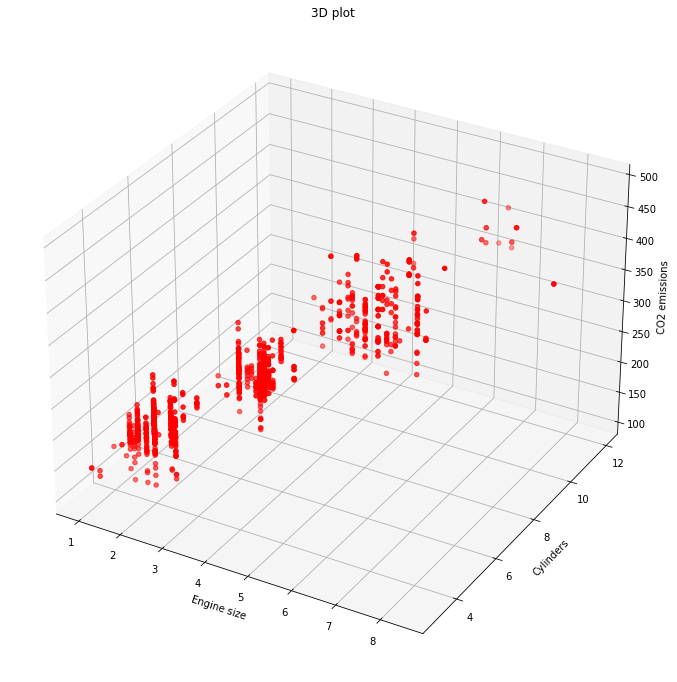

In [25]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(14,12))
ax = plt.axes(projection='3d')
ax.scatter3D(fuelRegression['ENGINESIZE'],
             fuelRegression['CYLINDERS'],
             fuel['CO2EMISSIONS'],color="red")
ax.set_xlabel('Engine size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 emissions')
ax.set_title("3D plot")

En un gráfico 3-dimensional se verifica aún más la tendencia líneal, los datos se podrían modelar como hiperplanos

# Normalize the data by feature-scaling
* try to make in a way that you can turn it on and off
* if you comment the feature scaling the program should still work

In [26]:
from sklearn import preprocessing

In [27]:
fuelRegression = preprocessing.StandardScaler().fit(fuelRegression).transform(fuelRegression)

In [28]:
fuelRegression

array([[-0.9512918 , -0.99896853, -0.82855772, -0.99334135, -0.88430407],
       [-0.66865251, -0.99896853, -0.5114328 , -0.63532912, -0.5685715 ],
       [-1.30459092, -0.99896853, -1.77993246, -1.31555236, -1.63058106],
       ...,
       [-0.24469358,  0.11424235,  0.02524013,  0.11649658,  0.06289365],
       [-0.10337393,  0.11424235, -0.09673099, -0.06250954, -0.08062116],
       [-0.10337393,  0.11424235,  0.3911535 ,  0.25970147,  0.34992326]])

Se realiza la normalización para que todas las características posean el mismo peso en el modelo de Machine Learning subsiguiente

# Split the data into train and test using scikit-learn

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [29]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test= train_test_split(fuelRegression,fuel['CO2EMISSIONS'].to_numpy(), test_size=0.2)

In [41]:
X_train.shape, y_train.shape

((853, 5), (853,))

Se definen dos conjuntos, uno de entrenamiento y otro de testeo

<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [42]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [43]:
regr.fit(X_train,y_train)

LinearRegression()

In [50]:
print("el intercepto de la regresión multilineal es:", regr.intercept_)
print("los coeficientes de la regresión multilineal son:\n", regr.coef_)


el intercepto de la regresión multilineal es: 256.1172854666626
los coeficientes de la regresión multilineal son:
 [ 15.4637589   13.64722079 -57.25839219 -35.6365144  125.20273122]


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Evaluate R2</h2>

In [52]:
R2=regr.score(X_test, y_test)
print('R2=',R2)

R2= 0.8709696401160265


<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [54]:
import random

In [59]:
index=random.sample(range(0,len(y_test)), 10)
index

[111, 95, 59, 137, 1, 78, 203, 47, 96, 143]

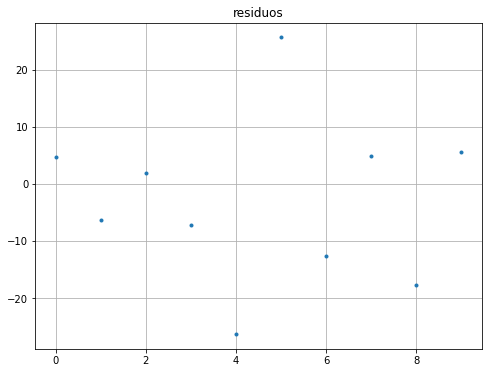

In [86]:
plt.figure(figsize=(8,6))

plt.title("residuos")
plt.plot(regr.predict(X_test[index])-y_test[index],".")
plt.grid()

Se observa que la diferencia de los valores predictos en contraposición a los valores reales.

La distribución de errores no sigue alguna tendencia sino que parecen aleatorios, de tal manera que el modelo no presenta heterocedasticidad

<h2 id="prediction">Print the metrics</h2>

* MAE    
* MAPE    
* R-squared    

In [102]:
predictions=regr.predict(X_test)

MAE=np.mean(abs(predictions-y_test) )
MAPE=np.mean(abs( (predictions-y_test)/y_test)  )*100
R2=regr.score(X_test, y_test)

print("El valor de MAE=",MAE)
print("El valor de MAPE=",MAPE,"%")
print('El valor de R2=',R2)

El valor de MAE= 16.310662552515602
El valor de MAPE= 6.426423714995018 %
El valor de R2= 0.8709696401160265


Analizando las métricas se encuentra un MAE de alrededor de 16, lo que implica que el modelo

## Realizando regresiones lineales con sólo una característica

In [143]:
def LinearRegression(field):
    
    fuelField=fuel[field].to_numpy().reshape(-1, 1)
    fuelRegressionST= preprocessing.StandardScaler().fit(fuelField ).transform(fuelField)
    
    X_train, X_test, y_train, y_test= train_test_split(fuelRegressionST,fuel['CO2EMISSIONS'].to_numpy(), test_size=0.2)
    
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    print("\n")
    print("Usando la característica\n",field )
    
    print("el intercepto de la regresión lineal es:", regr.intercept_)
    print("los coeficientes de la regresión lineal son:\n",regr.coef_)


    predictions=regr.predict(X_test)

    MAE=np.mean(abs(predictions-y_test) )
    MAPE=np.mean(abs( (predictions-y_test)/y_test)  )*100
    R2=regr.score(X_test, y_test)

    print("El valor de MAE=",MAE)
    print("El valor de MAPE=",MAPE,"%")
    print('El valor de R2=',R2)
    
    
    index=random.sample(range(0,len(y_test)), 10)
    plt.figure(figsize=(8,6))
    plt.title("residuos")
    plt.plot(regr.predict(X_test[index])-y_test[index],".")
    plt.grid()
    plt.show()



Usando la característica
 ENGINESIZE
el intercepto de la regresión lineal es: 255.78732465647175
los coeficientes de la regresión lineal son:
 [55.55894755]
El valor de MAE= 22.30425701067737
El valor de MAPE= 9.008328721531855 %
El valor de R2= 0.7924249671053206


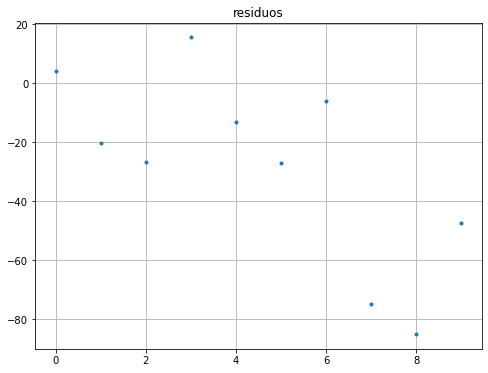



Usando la característica
 CYLINDERS
el intercepto de la regresión lineal es: 256.0226213002304
los coeficientes de la regresión lineal son:
 [53.20988539]
El valor de MAE= 26.20684829589299
El valor de MAPE= 10.14254968355673 %
El valor de R2= 0.7127932000900006


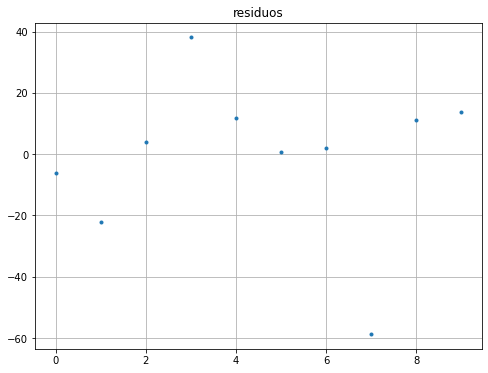

In [144]:
LinearRegression('ENGINESIZE')

LinearRegression('CYLINDERS')

Se observa que los valores de las métricas MSE, MAPE son mayores y que el R2 es menor cuando se usa sólo una característica para realizar la predicción lo que indica que el modelo está equivocándose más an comparación a la regresión lineal con cinco características, además que la gráfica de los residuos posee un rango más amplio en el caso de una variable, es así que se concluye que se prefiere el modelo con cinco características para realizar la predicción de las emisiones de CO2